# Prediksi Penderita Penyakit Jantung

## Description

Database ini berisi 76 atribut, tetapi semua percobaan yang dipublikasikan merujuk pada penggunaan 14 subset. Secara khusus, database heart deases adalah satu-satunya yang telah digunakan oleh para peneliti. Data ini merupakan data sekunder yang dapat diakses di https://www.kaggle.com/ronitf/heart-disease-uci/kernels adapun 14 attribut yang digunakan sebagai berikut:

1. age : menunjukkan usia dalam tahun
2. sex : menunjukkan gender dinotasikan dalam 0=female, 1=male
3. cp : tipe nyeri dada dinotasikan dalam 0= tipikal angina, 1= bukan tipikal 4. angina, 2= bukan sakit anginal, 3= tanpa gejala
5. trestbps : tekanan darah (dalam mm Hg saat masuk ke rumah sakit)
6. chol : serum kolestrol dalam mg/dl
7. fbs : kadar gula darah puasa > 120 mg/dl (1=true, 0=false)
8. restecg : hasil elektrokardiografi (0= normal, 1= memiliki kelainan 9. gelombang ST-T (inversi gelombang T dan / atau elevasi atau depresi ST> 0,05 mV), 2=menunjukkan hipertrofi ventrikel kiri yang mungkin atau pasti berdasarkan kriteria Estes)
9. thalach : denyut jantung maksimum tercapai
10. exang : latihan induksi angina (1= yes, 0=false)
11. oldpeak : Depresi ST (prinzmetal angina) disebabkan oleh olahraga relatif terhadap istirahat
12. slope : kemiringan segmen latihan ST (prinzmetal angina) puncak
13. ca : angka major vessels (0-3) diwarnai oleh flourosopy
14. thal : 3 = normal; 6 = cacat tetap; 7 = cacat yang tidak tetap
15. target : menunjukkan apakah seseorang terkena penyakit jantung atau tidak (1= ya atau 0= tidak)

### **Import Libraries** 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

###### Import Library untuk memanggil package yang dibutuhkan

### **Read Data** 

In [0]:
heart = pd.read_csv('https://raw.githubusercontent.com/MaxiJo/FinalProjectFGA/master/heart.csv')

In [0]:
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


###### Melihat data 10 teratas

### **EDA (Exploratory Data Analysis)**

#### Identify the type of data 

In [0]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Untuk melihat tipe data dan berapa data yang hilang pada setiap variable

#### Exprolasi Data 

In [0]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Untuk melihat nilai total, nilai tengah, standar deviasi, nilai min, quarter 1, quarter 2, quarter 3 dan nilai maksimum. 

#### Getting the number of instance and features

In [0]:
print("Total Row Number: {0} \nTotal Col Number: {1}".format(heart.shape[0], heart.shape[1]))

Total Row Number: 303 
Total Col Number: 14


Melihat dimensi dari data 

#### Checking for null values in the dataset 

In [0]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Untuk melihat berapa data yang hilang dari setiap variable 

In [0]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Nilai Aktual 

### **Data Visualization**

**Show** **Gender**

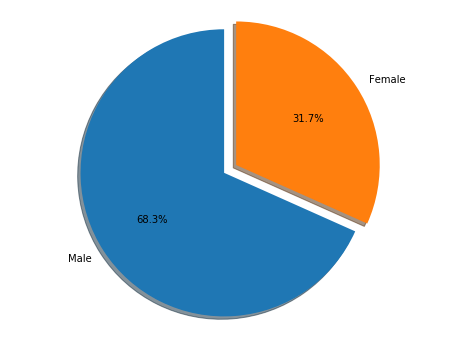

In [0]:
male = len(heart[heart['sex'] == 1])
female = len(heart[heart['sex'] == 0])

plt.figure(figsize = (8,6))

#Data to plot
labels = 'Male', 'Female'
sizes = [male, female]
explode = (0.05, 0.05)

#plot
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

Gambar 1 Melihat berapa jumlah presentase Perempuan dan Laki-laki yang ada pada dataset. Pada data diatas sample laki-laki yang lebih banyak diambil. 

**Show Cheast Pain Type**

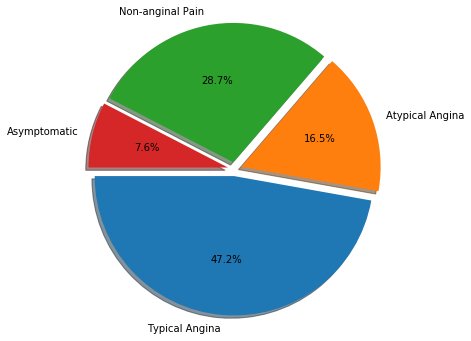

In [0]:
plt.figure(figsize=(8,6))

#Data to plot
labels = 'Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'
sizes = [len(heart[heart['cp'] == 0]), len(heart[heart['cp'] == 1]), len(heart[heart['cp'] == 2]), len(heart[heart['cp'] == 3])]
explode = (0.05, 0.05, 0.05, 0.05)

#plot
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.show()

Gambar 2 Melihat berapa jumlah presentase dari tipe nyeri dada. Dari gambar diatas dapat disimpulkan Typical Angina lebih mendominan dibandingan nyeri dada tipe lain.

**Show Fasting Blood Sugar**

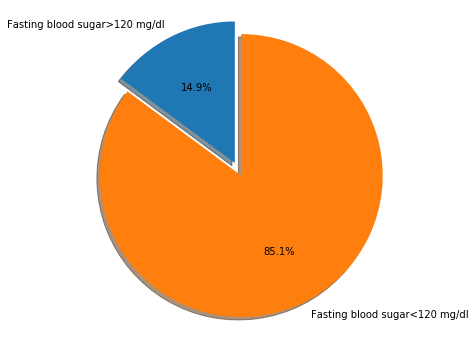

In [0]:
plt.figure(figsize=(8,6))

#Data to plot
labels = 'Fasting blood sugar>120 mg/dl', 'Fasting blood sugar<120 mg/dl'
sizes = [len(heart[heart['fbs'] == 1]), len(heart[heart['fbs'] == 0])]
explode = (0.05, 0.05)

#Plot
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

Gambar 3 Presentase gula darah setelah puasa. Dari gambar diatas lebih banyak yang memiliki gula darah <120 mg/dl

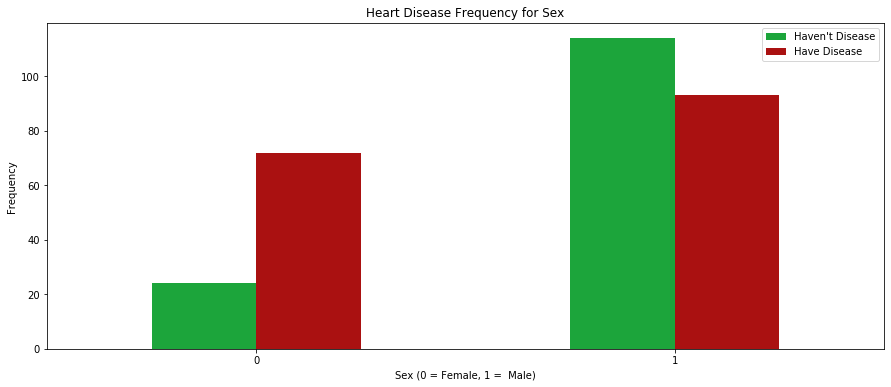

In [0]:
pd.crosstab(heart.sex, heart.target).plot(kind="bar", figsize=(15,6), color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 =  Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Gambar 4 Melihat presentase pasien yang terkena penyakit jantung berdasarkan jenis kelamin.

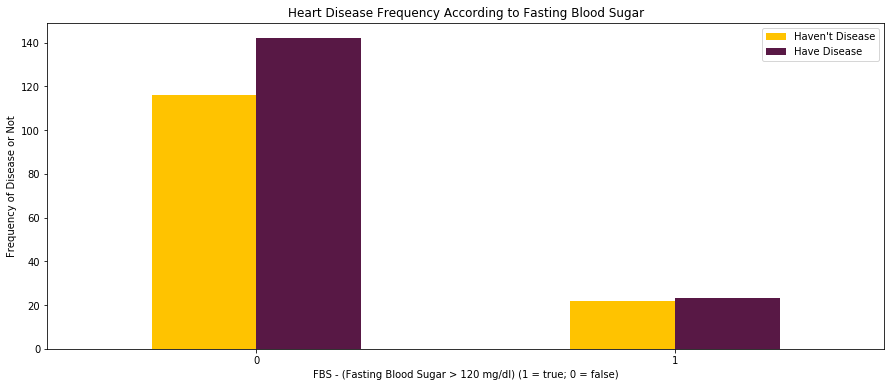

In [0]:
pd.crosstab(heart.fbs, heart.target).plot(kind="bar", figsize=(15,6), color=['#FFC300', '#581845'])
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

Gambar 6 Melihat presentase pasien yang terkena penyakit jantung berdasarkan  gula darah setelah puasa.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


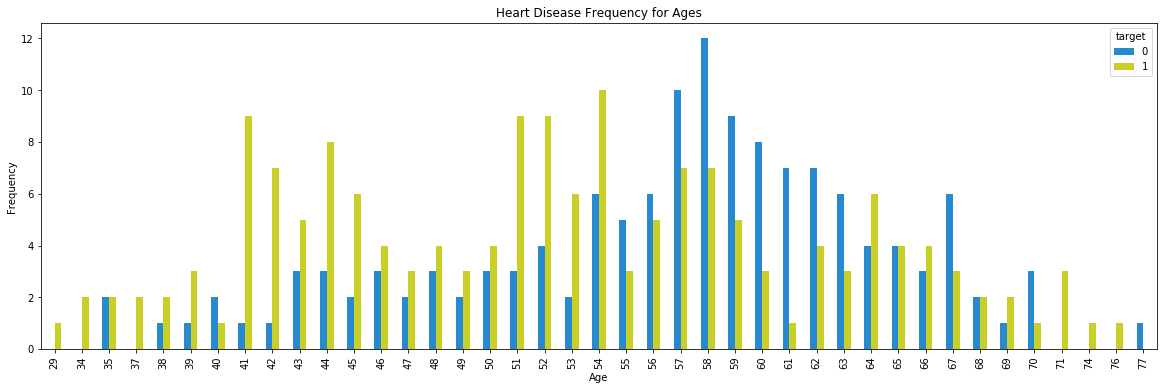

In [0]:
pd.crosstab(heart.age, heart.target).plot(kind="bar", figsize=(20,6),colors=['#2789cf','#c9cf27'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

Gambar 7 Melihat presentase pasien yang terkena penyakit jantung berdasarkan umur.

### **Decision Tree**

**Setting up Decision Tree**

In [0]:
from sklearn.model_selection import train_test_split

y = heart.target.values
x = heart.drop(['target'], axis=1)

untuk mendefenisikan nilai X dan Y yang akan dilakukan untuk data train dan data testing 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

nilai testing = 0.2 dan nilai train = 0.8 

In [0]:
#Transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

**Modelling**

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
heartTree = DecisionTreeClassifier(max_features = 10)
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}

treemodel = GridSearchCV(heartTree, param_grid=params, n_jobs=-1)
heartTree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
heartTree.fit(x_train.T, y_train.T)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Prediction

In [0]:
predTree = heartTree.predict(x_test.T)

Accuracy Metrics

In [0]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_test.T, predTree))
print('Using Decision Tree we get an accuracy score of: ',
     round(metrics.accuracy_score(y_test.T,predTree),5)*100, '%')

DecisionTree's Accuracy:  0.8032786885245902
Using Decision Tree we get an accuracy score of:  80.328 %


Classification Report

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test.T, predTree))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.82      0.82      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



Confusion Matrix

In [0]:
cnf_matrix_dt = confusion_matrix(y_test, predTree)
cnf_matrix_dt

array([[21,  6],
       [ 6, 28]])

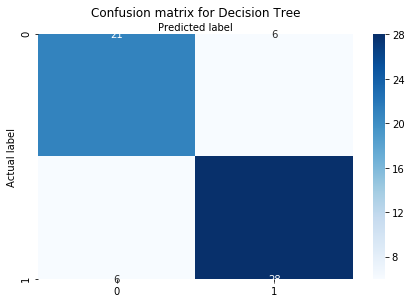

In [0]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dt), annot = True, cmap = "Blues", fmt = "d")
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# KNN Classification

Importing libraries

In [0]:
from sklearn.decomposition import PCA #testing data
from sklearn.neighbors import KNeighborsClassifier #making knn classification
from sklearn.model_selection import GridSearchCV,cross_val_score #testing KNN
from sklearn.metrics import roc_curve, auc #testing KNN acuracy and perfomance

Mengatur Data for KNN

In [0]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

normalisasi data(mengeleminasi data dengan nilai negatif)

In [0]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

membuat PCA untuk melihat data telah layak untuk di klasifikasikan

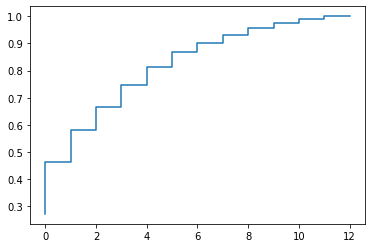

In [0]:
pca=PCA().fit(X_train)
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

scatter plot untuk melihat hasil PCA telah berhasil 

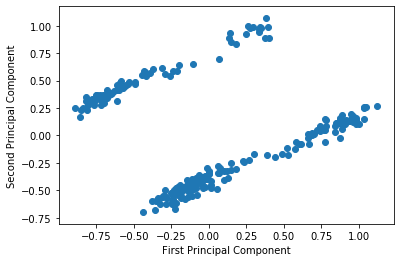

In [0]:
pca = PCA(n_components=8)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

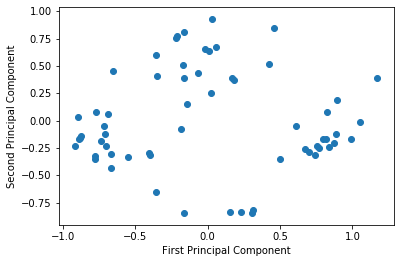

In [0]:
pca = PCA(n_components=8)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

memasukan data yang telah di olah dalam variabel

In [0]:
reduced_data_train = pd.DataFrame(reduced_data_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
X_train=reduced_data_train
X_test=reduced_data_test

membuat fungsi yang akan digunakan pada grafik AUC dan plot confussion matrix

In [0]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):   
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

membuat list fitur yang telah di klasifikasikan

In [0]:
combine_features_list=[
    ('Dim1','Dim2','Dim3'),
    ('Dim4','Dim5','Dim6'),
    ('Dim7','Dim8','Dim1'),
    ('Dim4','Dim8','Dim5')
]

mencari nilai n yang optimal

In [0]:
parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    }
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
**************************************************


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set:
{'n_jobs': 2, 'n_neighbors': 29}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       109
           1       0.78      0.83      0.81       133

    accuracy                           0.78       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.78      0.78      0.78       242

**************************************************
Train Confusion Matrix:
[[ 78  31]
 [ 22 111]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.76      0.88      0.81        32

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set:
{'n_jobs': 2, 'n_neighbors': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       109
           1       0.87      0.88      0.88       133

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242

**************************************************
Train Confusion Matrix:
[[ 92  17]
 [ 16 117]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.55      0.59      0.57        29
           1       0.60      0.56      0.58        32

    accuracy                           0.57        61
   macro avg       0.57      0.57      0.5

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set:
{'n_jobs': 2, 'n_neighbors': 30}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       109
           1       0.80      0.83      0.82       133

    accuracy                           0.80       242
   macro avg       0.80      0.79      0.79       242
weighted avg       0.80      0.80      0.80       242

**************************************************
Train Confusion Matrix:
[[ 82  27]
 [ 22 111]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        29
           1       0.72      0.81      0.76        32

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set:
{'n_jobs': 2, 'n_neighbors': 4}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       109
           1       0.91      0.68      0.78       133

    accuracy                           0.79       242
   macro avg       0.80      0.80      0.78       242
weighted avg       0.81      0.79      0.78       242

**************************************************
Train Confusion Matrix:
[[100   9]
 [ 43  90]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.47      0.62      0.54        29
           1       0.52      0.38      0.44        32

    accuracy                           0.49        61
   macro avg       0.50      0.50      0.4

melihat perfoma data sesuai nilai n yang optimal

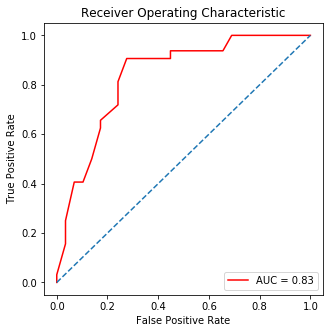

Accurancy Oranı : 0.7868852459016393
KNN TRAIN score with  0.8016528925619835
KNN TEST score with  0.7868852459016393

[[19 10]
 [ 3 29]]


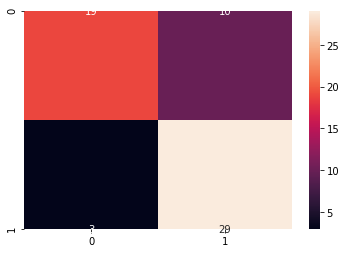

In [0]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=30)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

#Kesimpulan

Dari dua algoritma yang digunakan yaitu Decision Tree dan KNN ternyata tingkat akurasi Algoritma Decision Tree lebih besar yaitu  80.328 % sedangkan tingkat akurasi KNN yakni 78%.